In [1]:
import torch
import torchvision
import torchvision.transforms as tt
from torchvision.datasets import ImageFolder

In [13]:
import socket
hname = socket.gethostname()
if "futuresystems" in hname:
    PATH = "/N/u/sekanaya/sali/git/github/esaliya/python/data/cifar10/"
elif "MacBook" in hname:
    PATH = "/Users/esaliya/sali/data/cifar10/"
else:
    print("Error: couldn't figure out the data path for the host")
train_dir, test_dir = PATH + 'train', PATH + 'test'

In [49]:
transforms = tt.Compose(
    [tt.ToTensor(),
     tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = ImageFolder(train_dir, transforms)
test_set = ImageFolder(test_dir, transforms)

In [22]:
batch_size = 4
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [33]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [24]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 
           'frog', 'horse', 'ship', 'truck')

**Let's see some of these images with their labels**

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

tensor([ 7,  3,  8,  6])
torch.Size([4, 3, 32, 32])
horse   cat  ship  frog


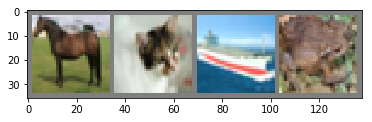

In [51]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)
print(images.shape)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Define a CNN**

In [27]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 *5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
                      

**Define a loss function and optimizer**

In [29]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**Train the network**

In [44]:
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    
print('Finished Training')
    
    

[1,  2000] loss: 1.191
[1,  4000] loss: 1.173
[1,  6000] loss: 1.175
[1,  8000] loss: 1.154
[1, 10000] loss: 1.168
[1, 12000] loss: 1.148
[2,  2000] loss: 1.055
[2,  4000] loss: 1.076
[2,  6000] loss: 1.086
[2,  8000] loss: 1.063
[2, 10000] loss: 1.068
[2, 12000] loss: 1.042
[3,  2000] loss: 0.964
[3,  4000] loss: 0.966
[3,  6000] loss: 0.989
[3,  8000] loss: 1.001
[3, 10000] loss: 0.993
[3, 12000] loss: 1.021
[4,  2000] loss: 0.925
[4,  4000] loss: 0.912
[4,  6000] loss: 0.929
[4,  8000] loss: 0.912
[4, 10000] loss: 0.933
[4, 12000] loss: 0.973
[5,  2000] loss: 0.870
[5,  4000] loss: 0.880
[5,  6000] loss: 0.873
[5,  8000] loss: 0.902
[5, 10000] loss: 0.899
[5, 12000] loss: 0.887
[6,  2000] loss: 0.799
[6,  4000] loss: 0.836
[6,  6000] loss: 0.835
[6,  8000] loss: 0.875
[6, 10000] loss: 0.861
[6, 12000] loss: 0.866
[7,  2000] loss: 0.764
[7,  4000] loss: 0.783
[7,  6000] loss: 0.809
[7,  8000] loss: 0.829
[7, 10000] loss: 0.843
[7, 12000] loss: 0.841
[8,  2000] loss: 0.757
[8,  4000] 

**Test the network on the test data**

GroundTruth:  plane plane plane plane


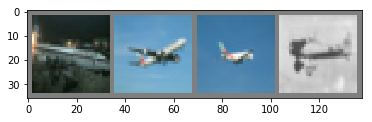

In [45]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

*Let's see what the network outputs for these test images*

In [46]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

Predicted:  plane plane plane plane


**Let's see how the network performed on the whole test dataset**

In [47]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print("accuracy of the network on the 10k test images: %d %%" % (100 * correct / total))

accuracy of the network on the 10k test images: 61 %


*Accuracy per class*

In [48]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 10

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100*class_correct[i] / class_total[i]))
    
        

Accuracy of plane :  5 %
Accuracy of   car :  7 %
Accuracy of  bird :  5 %
Accuracy of   cat :  4 %
Accuracy of  deer :  6 %
Accuracy of   dog :  5 %
Accuracy of  frog :  6 %
Accuracy of horse :  6 %
Accuracy of  ship :  7 %
Accuracy of truck :  7 %
